In [242]:
from hdv import *
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [131]:
COS_SIM_THRESHOLD = 0.075
RNG = np.random.default_rng()

In [22]:
hdv = Hdv(10000, np)

In [23]:
x1 = hdv()
x2 = hdv()
(x1 == x2).sum(), hdv.absdist(x1, x2), hdv.reldist(x1, x2), hdv.sim(x1, x2)

(np.int64(4982), 5018, 0.5018, np.float64(-0.0036))

In [270]:
for _ in range(1000):
    x1 = hdv()
    x2 = hdv()
    s = hdv.sim(x1, x2)
    assert s < COS_SIM_THRESHOLD
    assert np.isclose(hdv.normalize(x1) @ hdv.normalize(x2), s)

In [25]:
b = hdv.bundle_noties(x1, x2)
x1, x2, b, hdv.absdist(x1, b), hdv.absdist(x2, b), hdv.reldist(x1, b), hdv.reldist(x2, b), hdv.sim(x1, b), hdv.sim(x2, b)

(array([ 1, -1, -1, ...,  1, -1,  1], dtype=int8),
 array([ 1,  1,  1, ..., -1, -1, -1], dtype=int8),
 array([ 1,  0,  0, ...,  0, -1,  0]),
 5049,
 5049,
 0.5049,
 0.5049,
 np.float64(0.7036334272900912),
 np.float64(0.7036334272900912))

In [26]:
for _ in range(1000):
    b = hdv.bundle_noties(x1, x2)
    assert hdv.sim(x1, b) > COS_SIM_THRESHOLD
    assert hdv.sim(x2, b) > COS_SIM_THRESHOLD

In [27]:
b = hdv.bundle_ties(x1, x2)
x1, x2, b, hdv.absdist(x1, b), hdv.absdist(x2, b), hdv.reldist(x1, b), hdv.reldist(x2, b), hdv.sim(x1, b), hdv.sim(x2, b)

(array([ 1, -1, -1, ...,  1, -1,  1], dtype=int8),
 array([ 1,  1,  1, ..., -1, -1, -1], dtype=int8),
 array([ 1,  1,  1, ...,  1, -1,  1]),
 2539,
 2510,
 0.2539,
 0.251,
 np.float64(0.4922),
 np.float64(0.498))

In [28]:
for _ in range(1000):
    b = hdv.bundle_ties(x1, x2)
    assert hdv.sim(x1, b) > COS_SIM_THRESHOLD
    assert hdv.sim(x2, b) > COS_SIM_THRESHOLD

In [29]:
assert hdv.sim(x1, hdv.bundle_noties(x1, x2)) > COS_SIM_THRESHOLD

In [30]:
b = hdv.bind(x1, x2)
x1, x2, b, hdv.reldist(x1, b), hdv.reldist(x2, b), hdv.reldist(x1, x2), hdv.sim(x1, b), hdv.sim(x2, b)

(array([ 1, -1, -1, ...,  1, -1,  1], dtype=int8),
 array([ 1,  1,  1, ..., -1, -1, -1], dtype=int8),
 array([ 1, -1, -1, ..., -1,  1, -1]),
 0.5021,
 0.505,
 0.5049,
 np.float64(-0.0042),
 np.float64(-0.01))

In [31]:
for _ in range(1000):
    b = hdv.bind(x1, x2)
    assert hdv.sim(x1, b) < COS_SIM_THRESHOLD
    assert hdv.sim(x2, b) < COS_SIM_THRESHOLD

In [32]:
s = hdv.shift(x1)
x1, s, hdv.absdist(x1, s), hdv.reldist(x1, s), hdv.sim(x1, s)

(array([ 1, -1, -1, ...,  1, -1,  1], dtype=int8),
 array([ 1,  1, -1, ..., -1,  1, -1], dtype=int8),
 5012,
 0.5012,
 np.float64(-0.0024))

In [33]:
for _ in range(1000):
    s = hdv.shift(x1)
    assert hdv.sim(x1, s) < COS_SIM_THRESHOLD

In [34]:
m = hdv(3)
m, hdv.bundle_noties(m)

(array([[ 1, -1,  1, ..., -1, -1,  1],
        [ 1, -1, -1, ..., -1,  1, -1],
        [-1, -1,  1, ..., -1, -1,  1]], dtype=int8),
 array([ 1, -1,  1, ..., -1, -1,  1]))

In [35]:
for _ in range(128*128):
    x1 = hdv()
    x2 = hdv()
    x3 = hdv()
    assert np.array_equal(hdv.bind(x1, hdv.bundle_noties(x2, x3)), hdv.bundle_noties(hdv.bind(x1, x2), hdv.bind(x1, x3)))
    assert np.isclose(hdv.sim(x1, x2), hdv.sim(hdv.bind(x1, x3), hdv.bind(x2, x3)))
    assert np.isclose(hdv.sim(x1, x2), hdv.sim(hdv.shift(x1), hdv.shift(x2)))

In [38]:
hdv1 = hdv.normalize(hdv())
hist = None
trials = 100

for _ in tqdm(range(100)):
    other_hdvs = hdv.normalize(hdv(10000))
    cos_sims = other_hdvs @ hdv1
    cos_sims *= 100
    h = np.histogram(cos_sims, bins=list(range(-10, 10 + 1, 1)))
    hist = h[0] if hist is None else hist + h[0]

  0%|          | 0/100 [00:00<?, ?it/s]

In [40]:
df = pd.DataFrame(columns=['Range', 'Count', '%'])
df['Range'] = list(map(lambda pair: f'{pair[0]:6.2f}, {pair[1]:6.2f}', (zip(h[1]/100, h[1][1:]/100))))
df['Count'] = hist
df['%'] = list(map(lambda p: f'{p*100:.4f}%', hist / (np.sum(hist))))
df

,Range,Count,%
0,"-0.10, -0.09",0,0.0000%
1,"-0.09, -0.08",0,0.0000%
2,"-0.08, -0.07",0,0.0000%
3,"-0.07, -0.06",0,0.0000%
4,"-0.06, -0.05",1,0.0001%
5,"-0.05, -0.04",25,0.0025%
6,"-0.04, -0.03",1226,0.1226%
7,"-0.03, -0.02",21105,2.1105%
8,"-0.02, -0.01",134824,13.4824%
9,"-0.01, 0.00",343144,34.3144%


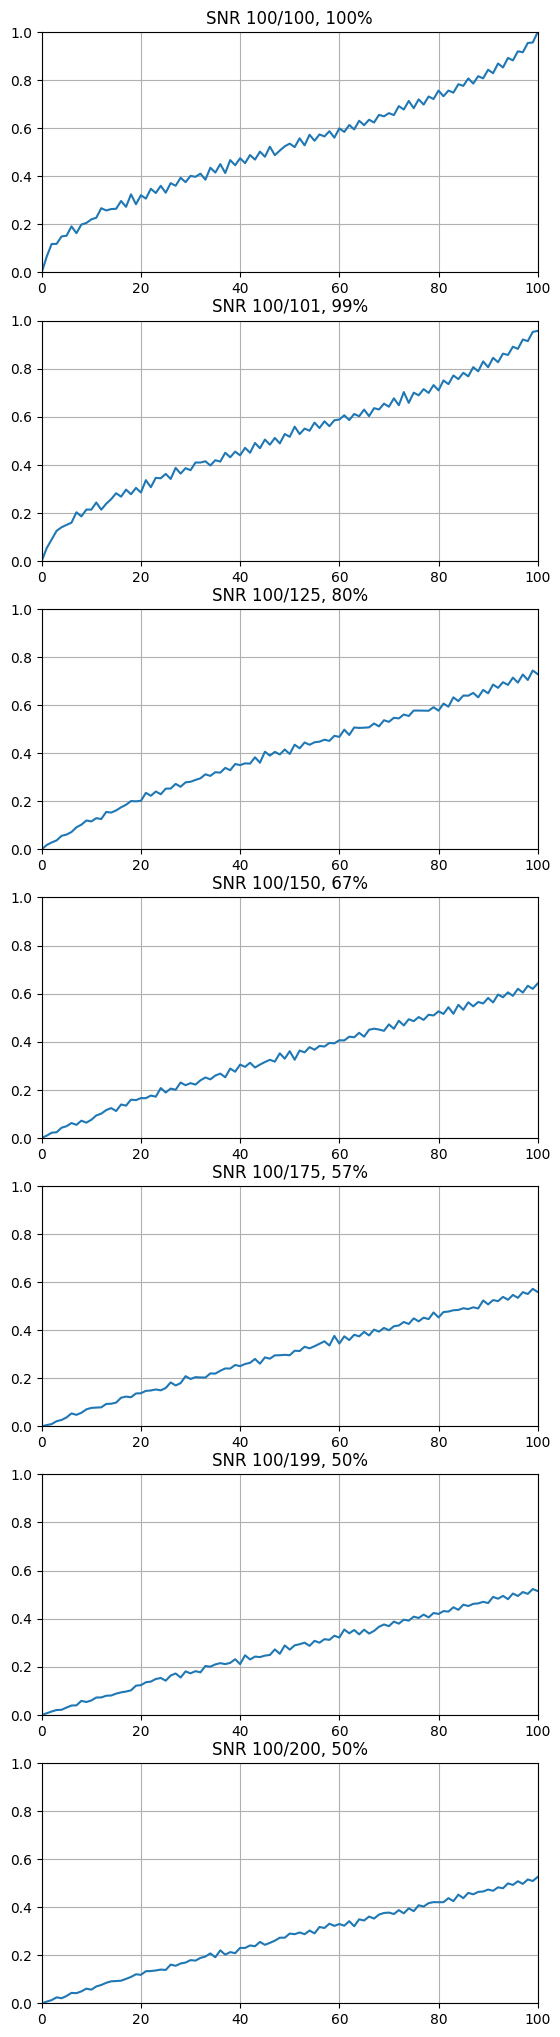

In [271]:
signal_hdvs = hdv(100)
signal_points = list(range(0, signal_hdvs.shape[0] + 1))
bundle = hdv.bundle(signal_hdvs)

noise_hdvs = hdv(100)
noise_points = [0, 1, 25, 50, 75, 99, 100]

values = []

for noise_hdv_count in noise_points:
    noise_hdv_indices = RNG.choice(noise_hdvs.shape[0], noise_hdv_count, replace=False)
    noise_level_values = []
    
    for signal_hdv_count in signal_points:
        if signal_hdv_count == 0:
            noise_level_values.append(0)
            continue
            
        signal_hdv_indices = RNG.choice(signal_hdvs.shape[0], signal_hdv_count, replace=False)
        b = hdv.bundle(list(noise_hdvs[noise_hdv_indices]) + list(signal_hdvs[signal_hdv_indices]))
        sim = hdv.sim(bundle, b)
        noise_level_values.append(sim)

    values.append(noise_level_values)

fig, ax = plt.subplots(len(noise_points)) 
fig.set_figheight(fig.get_figwidth() * 4)

for x in range(len(noise_points)):
    ax[x].set_ylim(0, 1)
    ax[x].set_xlim(0, max(signal_points))
    ax[x].grid()
    ax[x].plot(signal_points, values[x])
    ax[x].set_title(f'SNR {len(signal_hdvs)}/{len(signal_hdvs)+noise_points[x]}, {len(signal_hdvs)/(len(signal_hdvs)+noise_points[x])*100:.0f}%')
    
plt.show()

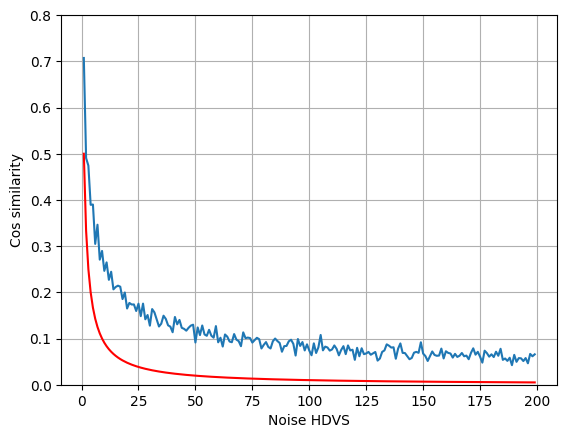

In [294]:
signal_hdv = hdv()
points = list(range(1, 200))
values = []
theoretical_snr = []

for x in points:
    noise_hdvs = hdv(x + 1)[:x]
    b = hdv.bundle([signal_hdv] + list(noise_hdvs))
    sim = hdv.sim(signal_hdv, b)
    values.append(sim)
    theoretical_snr.append(1/(1+x))

#plt.bar(points, values)
plt.plot(points, values)
plt.xlabel('Noise HDVS')
plt.ylabel('Cos similarity')
#ax2 = plt.gca().twinx()
#ax2.plot(points, theoretical_snr, '-r')
plt.plot(points, theoretical_snr, '-r')
plt.ylim(0, 0.8)
plt.grid()
plt.show()